In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# [Uniform distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html)
Each outcome realizes with the same probability.

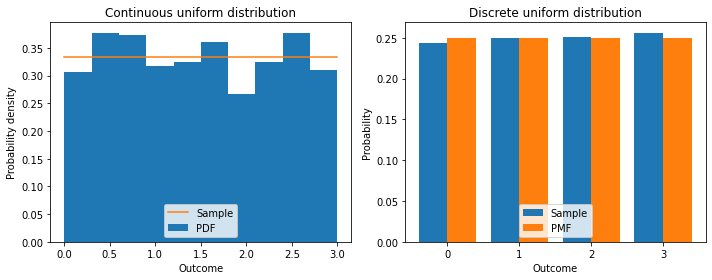

In [3]:
start = 0 # From start...
end = 3   # ...to end.
s = 1000  # Sample size.

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Continuous.
uniform_sample = stats.uniform.rvs(start, end - start, size = s)
uniform_pmf = stats.uniform.pdf([start, end], start, end - start)

ax[0].hist(uniform_sample, density=True)
ax[0].plot(np.array([start, end]), uniform_pmf)

# Discrete.
d_uniform_sample = pd.Series(stats.randint.rvs(start, end + 1, size = s)).value_counts() / s
d_uniform_pmf = stats.randint.pmf(d_uniform_sample.index, start, end + 1)

width = 0.4
ax[1].bar(d_uniform_sample.index - width / 2, d_uniform_sample, width=width)
ax[1].bar(d_uniform_sample.index + width / 2, d_uniform_pmf, width=width)
ax[1].set_xticks(np.arange(start, end + 1))

ax[0].set_title('Continuous uniform distribution')
ax[1].set_title('Discrete uniform distribution')
ax[0].set_xlabel('Outcome')
ax[1].set_xlabel('Outcome')
ax[0].set_ylabel('Probability density')
ax[1].set_ylabel('Probability')
ax[0].legend(['Sample', 'PDF'], loc = 'lower center')
ax[1].legend(['Sample', 'PMF'], loc = 'lower center')

plt.tight_layout()
plt.show()

# [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)
Coin toss. Yes/No question.

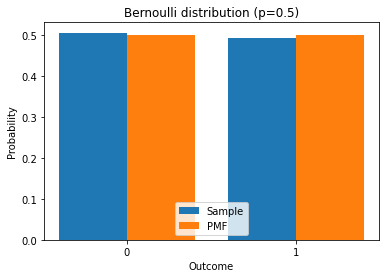

In [4]:
p = 0.5  # Probability of "success".
s = 1000 # Sample size.

x = stats.bernoulli.rvs(p, size = s)
bernoulli_sample = pd.Series(x).value_counts() / s
bernoulli_pmf = stats.bernoulli.pmf(1, p)

width = 0.4
plt.bar(bernoulli_sample.index - width / 2, bernoulli_sample, width=width)
plt.bar(pd.Series([0, 1]) + width / 2, bernoulli_pmf, width=width)
plt.xticks([0, 1])

plt.title('Bernoulli distribution (p=%.1f)' % p)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'], loc='lower center')

plt.show()

# [Binomial distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)
Number of "successes" in a series of Bernoulli trials.

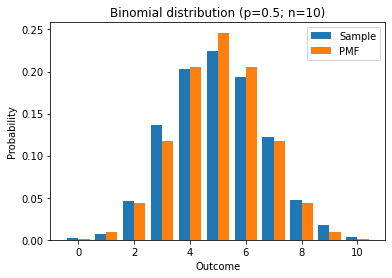

In [5]:
p = 0.5  # Probability of "success".
n = 10   # Number of trials per sample.
s = 1000 # Sample size.

x = stats.binom.rvs(n, p, size = s)
binom_sample = pd.Series(x).value_counts() / s
binom_pmf = stats.binom.pmf(range(n + 1), n, p)

width = 0.4
plt.bar(binom_sample.index - width / 2, binom_sample, width=width)
plt.bar(np.arange(n + 1) + width / 2, binom_pmf, width=width)
plt.xlim([-1, n + 1])

plt.title('Binomial distribution (p=%.1f; n=%d)' % (p, n))
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'])

plt.show()

# [Normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
Outcomes symmetrically distributed around a mean. The standard deviation dictates the dispersion. Unbounded.

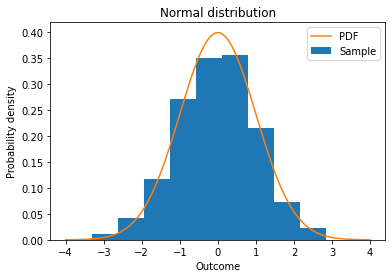

In [6]:
mu = 0    # Mean.
sigma = 1 # Standard deviation.
s = 1000  # Sample size.

normal_sample = stats.norm.rvs(mu, sigma, size = s)
lim = max(abs(normal_sample))   # Just for
x = np.linspace(-lim, lim, 100) # the plot.
normal_pdf = stats.norm.pdf(x, mu, sigma)

plt.hist(normal_sample, density=True)
plt.plot(x, normal_pdf)

plt.title('Normal distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability density')
plt.legend(['PDF', 'Sample'])

plt.show()

# Exponential
Counts time between events that happen at a constant average rate. Strictly non-negative.

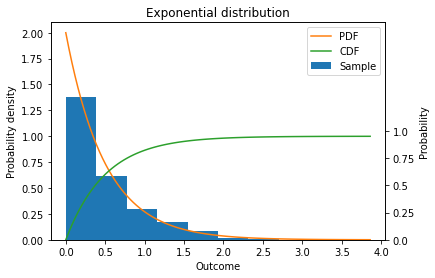

In [7]:
scale = 1 / 2 # Inverse rate (scale = 1 / lambda).
s = 1000      # Sample size.

exponential_sample = stats.expon.rvs(scale=scale, size = s)
x = np.linspace(0, max(exponential_sample), 100) # Just for the plot.
exponential_pdf = stats.expon.pdf(x, scale=scale)
exponential_cdf = stats.expon.cdf(x, scale=scale)

fig, ax1 = plt.subplots()
plt.hist(exponential_sample, density=True)
plt.plot(x, exponential_pdf)
plt.plot(x, exponential_cdf)

plt.title('Exponential distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability density')
plt.legend(['PDF', 'CDF', 'Sample'])
ax2 = ax1.twinx()
ax2.set_yticks(np.linspace(0, 0.5, 5))
ax2.set_yticklabels(np.linspace(0, 1, 5))
ax2.set_ylabel('Probability')

plt.show()

# [Poisson distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)
Counts how many times something happened, when this something happens at a rate given by an exponential distribution.

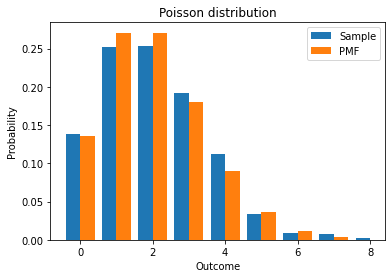

In [8]:
mu = 2   # Mean and variance (usually called lambda).
s = 1000 # Sample size.

x = stats.poisson.rvs(mu, size=s)
poisson_sample = pd.Series(x).value_counts() / s
poisson_pmf = stats.poisson.pmf(np.arange(max(poisson_sample.index)), mu)

width = 0.4
plt.bar(poisson_sample.index - width / 2, poisson_sample, width=width)
plt.bar(np.arange(max(poisson_sample.index)) + width / 2, poisson_pmf, width=width)

plt.title('Poisson distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.legend(['Sample', 'PMF'])

plt.show()

# [t distribution](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html)
Similar to the normal distribution, but with heavier tails. Used some statistical tests.

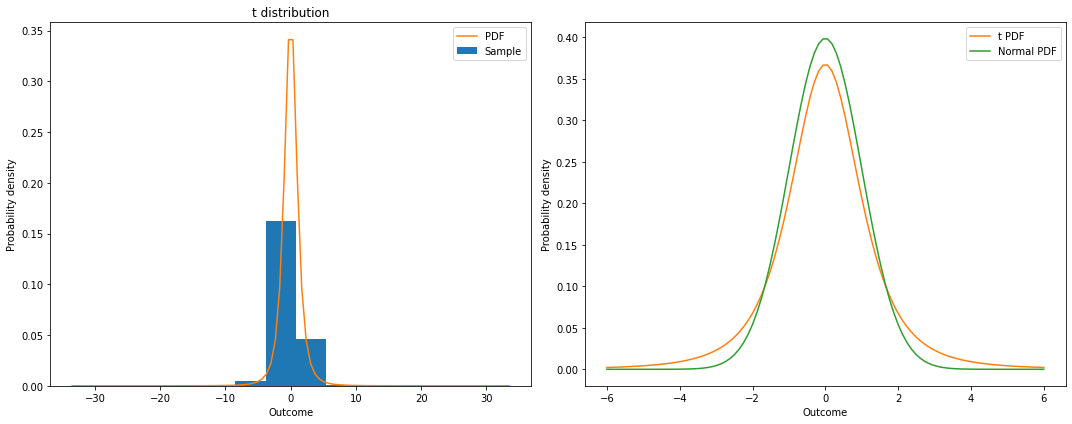

In [9]:
df = 3   # Degrees of freedom (df == Inf is a normal distribution).
s = 1000 # Sample size.

t_sample = stats.t.rvs(df, size = s)
lim = max(abs(t_sample))        # Just for
x = np.linspace(-lim, lim, 100) # the plot.
t_pdf = stats.t.pdf(x, df)

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# t distribution.
ax[0].hist(t_sample, density=True)
ax[0].plot(x, t_pdf)

ax[0].set_title('t distribution')
ax[0].set_xlabel('Outcome')
ax[0].set_ylabel('Probability density')
ax[0].legend(['PDF', 'Sample'])

# t vs normal comparison.
x = np.linspace(-6, 6, 100)
sd = np.sqrt(df / (df - 2)) if df > 2 else 1
ax[1].plot(x, stats.t.pdf(x, df), c='tab:orange')
ax[1].plot(x, stats.norm.pdf(x, scale=1), c='tab:green')

ax[1].set_xlabel('Outcome')
ax[1].set_ylabel('Probability density')
ax[1].legend(['t PDF', 'Normal PDF'])

plt.tight_layout()
plt.show()

# Confidence intervals
Contain our estimate with a certain probability.

9.999999999999977
10.236227333333337


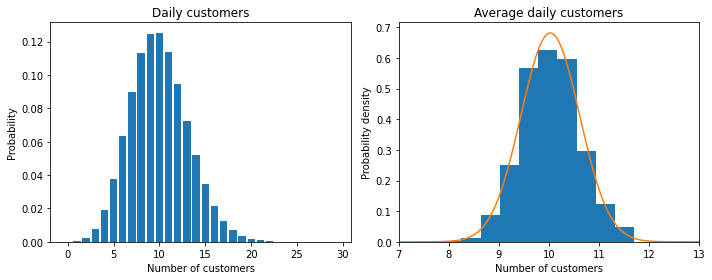

In [19]:
mu = 10
s = 10**6 # Population size.

n_customers = stats.poisson.rvs(mu, size=s)
n_customers = n_customers - np.mean(n_customers) + mu # Fake mean stabilization for the example.
print(np.mean(n_customers))

n = 30 # Sample size.
print(np.mean(np.random.choice(n_customers, n))) # This is an estimate of the "true" population mean.

mean_d = sorted(np.mean(np.random.choice(n_customers, n)) for i in range(1000)) # Sample of the means.

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

n_cust_dist = pd.Series(n_customers).value_counts() / s
ax[0].bar(n_cust_dist.index, n_cust_dist)
ax[1].hist(mean_d, density=True)

# Make the plots nicer.
window = 3
x = np.linspace(mu - window, mu + window, 100)
ax[1].plot(x, stats.norm.pdf(x, np.mean(mean_d), np.std(mean_d)))
ax[1].set_xlim(mu - window, mu + window)
ax[0].set_title('Daily customers')
ax[0].set_xlabel('Number of customers')
ax[0].set_ylabel('Probability')
ax[1].set_title('Average daily customers')
ax[1].set_xlabel('Number of customers')
ax[1].set_ylabel('Probability density')

plt.tight_layout()
plt.show()

In [11]:
# Usual confidence interval level is 95%.
# This interval contains 95% of our estimates.
lci_idx = int(len(mean_d) * 0.025)
uci_idx = int(len(mean_d) * 0.975) 
print(lci_idx, uci_idx) # Lower and upper confidence interval indices.

lci, uci = mean_d[lci_idx], mean_d[uci_idx]
print(lci, uci) # Samples close to confidence interval points.
stats.norm.interval(0.95, np.mean(mean_d), np.std(mean_d)) # Confidence interval.

# This was to illustrate what are confidence intervals.
# *Not* the real way of computing them.

25 975
8.903652 11.203652


(8.894240124090874, 11.158730542575789)

In [12]:
# The standard deviation of the means distribution is the SEM of a sample of size n.
print(np.std(n_customers), np.std(mean_d))

# SEM (standard error of the mean) = sd / sqrt(n)
print(np.std(n_customers) / np.sqrt(n), np.std(mean_d))

3.162988248934226 0.5776867422939727
0.5774800043550138 0.5776867422939727


In [13]:
n = 30
x = np.random.choice(n_customers, n)
print(np.mean(x)) # Sample mean.

# Confidence interval from a sample.
n_ci = stats.norm.interval(0.95, np.mean(x), stats.sem(x))
t_ci = stats.t.interval(0.95, len(x) - 1, np.mean(x), stats.sem(x)) # Best for low sample sizes.

print(n_ci)
print(t_ci)

10.536985333333332
(9.21890330750954, 11.855067359157124)
(9.161561881044864, 11.9124087856218)


# Hypothesis testing
2 samples can be different because a) they come from different distributions or b) due to the random nature of our sampling.

With hypothesis testing we want to know whether 2 things are different. Not **how much** different, just whether they are different **at all**, even if their differences are small.

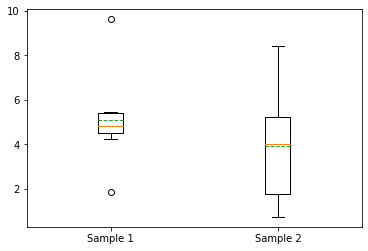

In [14]:
n = 10
s1 = stats.norm.rvs(5.0, 2, size=n)
s2 = stats.norm.rvs(5.1, 2, size=n)

# Green = mean; orange = median.
plt.boxplot([s1, s2], labels=['Sample 1', 'Sample 2'], showmeans=True, meanline=True)

plt.show()

The **p-value** is the probability that the difference we observe is due to chance, so the lower the p-value, the better (but this does not mean that the differences are big!).

In [15]:
# This is a 2-sided 1-sample t-test.
print(stats.ttest_1samp(s1, 5.0))
print(stats.ttest_1samp(s2, 5.0))

Ttest_1sampResult(statistic=0.1183541789125325, pvalue=0.9083864918322697)
Ttest_1sampResult(statistic=-1.3187340135115677, pvalue=0.21982639700805048)


In [16]:
# This is a 2-sided 2-sample t-test.
print(stats.ttest_ind(s1, s2))

Ttest_indResult(statistic=1.1261406982657223, pvalue=0.27489686634939375)


In [17]:
# Confidence intervals of the difference in means.
dif = np.mean(s2) - np.mean(s1)
sem = stats.sem(s1) + stats.sem(s2)
z = stats.norm.interval(0.95)[1]

lci, uci = dif - z * sem, dif + z * sem
print(lci, uci)

-3.901242972583191 1.6307850162262825


In [18]:
# p-value of the difference in means (probability that the difference is exactly 0).
stats.norm.cdf(dif / sem)

0.21058026061131152